In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tools

In [94]:
# wall spacing blade
nxp_p=np.array([    0.06317555863648920134   ,  0.15387840527645010869])
nxp_pm1=np.array([    0.06328761062334230247  ,   0.15379203379380579353])
a=np.sqrt((nxp_p[0]-nxp_pm1[0])**2+(nxp_p[1]-nxp_pm1[1])**2)
print a,5.*a

0.000141476785276 0.000707383926378


In [97]:
np_bl=60
bl_thick=0.13
span=1.5
spacing_wall=0.0005

In [98]:
sp_half=span/2.

In [99]:
#span spacing in simulations with homogenous span
print 0.3/384.

0.00078125


In [100]:
con=[]
Vcon=[]
### Value constraints
Vcon.append([1,0.0])
Vcon.append([np_bl,bl_thick])
con.append(Vcon)
### 1.st Derivative/spacing constraint
Dcon=[]
Dcon.append([1,spacing_wall])
con.append(Dcon)
### 2.nd Deriv
Dcon=[]
Dcon.append([1,0.0])
Dcon.append([np_bl,0])
con.append(Dcon)
### 3.rd Deriv
Dcon=[]
Dcon.append([1,0.0])
Dcon.append([np_bl,0])
con.append(Dcon)
### 4.th Deriv
Dcon=[]
Dcon.append([1,0.0])
Dcon.append([np_bl,0])
con.append(Dcon)

p3=tools.polynomial(con)
        
x3=range(1,Vcon[-1][0]+1)
y3=np.zeros(len(x3))
y3=p3.evaluate(x3,maxd=6)

sp_free=y3[1][-1]
np_free=int((span/2.-bl_thick)/sp_free)+1
print 'spacing at wall and in freestream ',y3[1][0],y3[1][-1]
print 'Points in free stream ',np_free
con=[]
Vcon=[]
### Value constraints
Vcon.append([1,bl_thick])
Vcon.append([np_free,span/2])
con.append(Vcon)
### 1.st Derivative/spacing constraint
Dcon=[]
Dcon.append([1,sp_free])
con.append(Dcon)
### 2.nd Deriv
Dcon=[]
Dcon.append([1,0.0])
Dcon.append([np_free,0])
con.append(Dcon)
## 3rd Deriv
Dcon=[]
Dcon.append([1,0.0])
Dcon.append([np_free,0])
con.append(Dcon)

## 4th Deriv
Dcon=[]
Dcon.append([1,0.0])
Dcon.append([np_free,0])
con.append(Dcon)

p4=tools.polynomial(con)
x4=range(1,Vcon[-1][0]+1)
y4=np.zeros(len(x4))
y4=p4.evaluate(x4,maxd=6)


print 'maximum spacing and ratio between highest and gen spacing', max(y3[1][:]), max(y3[1][:])/y3[1][0] 
print 'maximum spacing and ratio between highest and gen spacing', max(y3[1]), min(y3[1]) 
print 

number of conditions 9
order of polynomial function is 8
spacing at wall and in freestream  0.0005 0.00390677966102
Points in free stream  159
number of conditions 9
order of polynomial function is 8
maximum spacing and ratio between highest and gen spacing 0.00390677966102 7.81355932203
maximum spacing and ratio between highest and gen spacing 0.00390677966102 0.0005



In [101]:
n_tot=2*np_bl+np_free*2-3
grid=np.empty(n_tot)
for i in range(np_bl):
    grid[i]=y3[0][i]
    grid[-i-1]=span-y3[0][i]
for i in range(1,np_free-1):
    grid[i+np_bl-1]=y4[0][i]    
for i in range(1,np_free):
    grid[-i-np_bl]=span-y4[0][i] 

In [102]:
print p4.coeffs

[  1.26093220e-01   3.90677966e-03  -3.95399920e-12   3.97886712e-12
  -2.01437968e-12   4.17921908e-13  -5.06762184e-15   2.24836671e-17
  -3.51307299e-20]


<IPython.core.display.Javascript object>


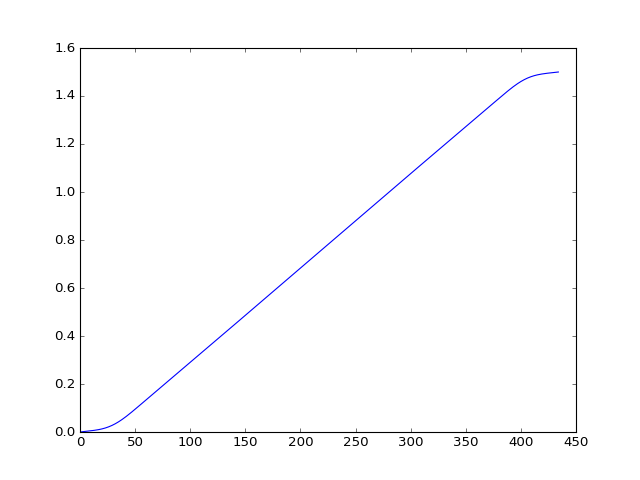

In [103]:
plt.figure()
plt.plot(grid[:])

In [104]:
print grid[-1]

1.5


In [110]:
cd ~/cmg/cases/vki_endwall/

/home/rp3e11/cmg/cases/vki_endwall


In [111]:
ifile=open('span_grid_coarse.dat','w')
ifile.write('%i \n'%n_tot)
for i in range(n_tot):
    ifile.write('%30.20f \n'%grid[i])
ifile.close()

<IPython.core.display.Javascript object>


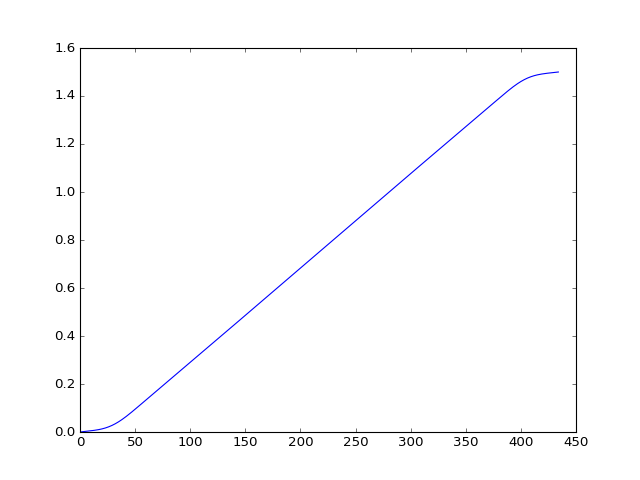

<IPython.core.display.Javascript object>


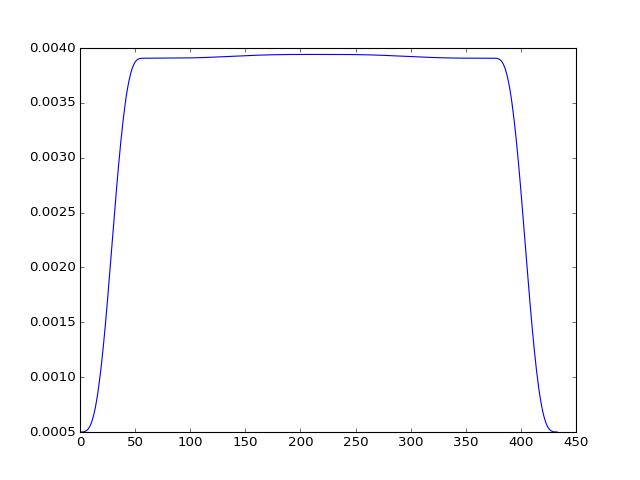

<IPython.core.display.Javascript object>


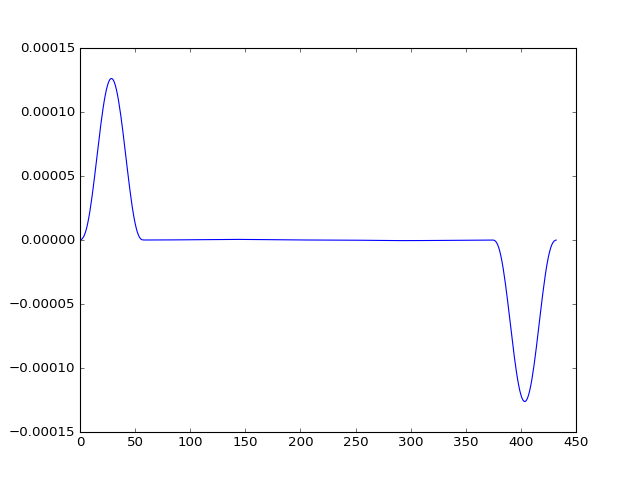

<IPython.core.display.Javascript object>


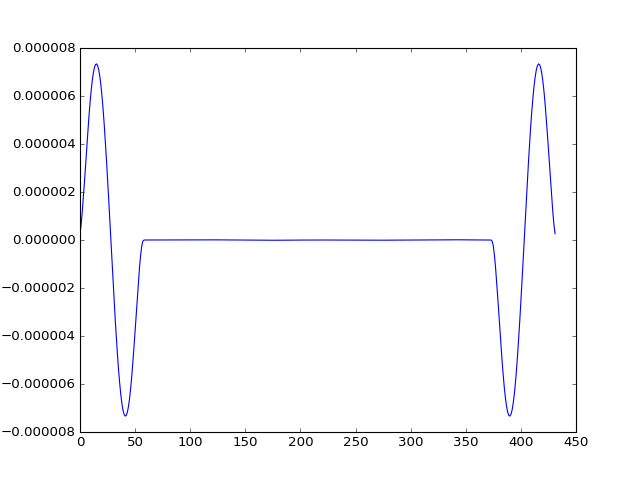

In [107]:
for i in range(4):
    plt.figure()
    plt.plot(np.diff(grid[:],n=i))

<IPython.core.display.Javascript object>


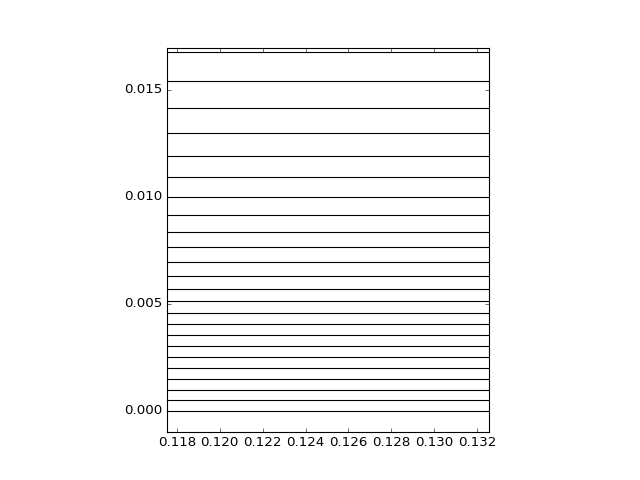

In [108]:
plt.figure()
plt.axes(aspect='equal')
for i in range(n_tot):
    plt.plot([0.,0.3],[grid[i],grid[i]],'k')


In [ ]:
print x.size

# Plot resulting blasius profile

In [ ]:
ifil=open('blasius.dat')
n_blas=int(ifil.readline())
profs=np.empty([5,n_blas])
for i in range(n_blas):
    tmep=ifil.readline().split()
    for j in range(5):
        profs[j,i]=float(tmep[j])

In [ ]:
plt.figure()
plt.plot(profs[1,:],profs[0,:])

In [ ]:
x=np.linspace(0.,2.,num=50)
y=np.tanh(x*4.)

In [ ]:
plt.figure()
plt.plot(x,y)

In [ ]:
0.799/(192.+48.)

In [ ]:
ifile=open('fort.200','r')
temp=ifile.readline().split()
nyp=int(temp[0])
nzp=int(temp[1])
data=np.empty([5,nzp,nyp])
for j in range(nzp):
    for i in range(nyp):
        temp=ifile.readline().split()
        for k in range(5):
            data[k,j,i]=float(temp[k])

In [ ]:
x=np.linspace(1.,float(nyp),num=nyp)
y=np.linspace(1.,float(nzp),num=nzp)
X,Y=np.meshgrid(x,y)


In [ ]:
plt.figure()
plt.contourf(X,Y,data[1,:,:])
plt.colorbar()

In [ ]:
plt.figure()
plt.plot(data[4,:,0])


In [ ]:
ifile=open('fort.300','r')
temp=ifile.readline().split()
nxp=int(temp[0])
nyp=int(temp[1])
nzp=int(temp[2])
data=np.empty([5,nzp,nyp,nxp])
for j in range(nzp):
    for i in range(nyp):
        for m in range(nxp):
            temp=ifile.readline().split()
            for k in range(5):
                data[k,j,i,m]=float(temp[k])
data1=np.empty([5,nzp,nyp,nxp])
for j in range(nzp):
    for i in range(nyp):
        for m in range(nxp):
            temp=ifile.readline().split()
            for k in range(5):
                data1[k,j,i,m]=float(temp[k])                

In [ ]:
x=np.linspace(1.,float(nyp),num=nyp)
y=np.linspace(1.,float(nzp),num=nzp)
X,Y=np.meshgrid(x,y)

In [ ]:
plt.figure()
plt.contourf(X,Y,data[4,:,:,2])
plt.colorbar()

In [ ]:
plt.figure()
plt.contourf(X,Y,data1[4,:,:,1])
plt.colorbar()